In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
titanic = pd.read_csv("../input/train.csv") 
titanic_t = pd.read_csv("../input/test.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

In [7]:
titanic = titanic.drop(['Cabin'], axis=1)
titanic_t = titanic_t.drop(['Cabin'], axis=1)

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

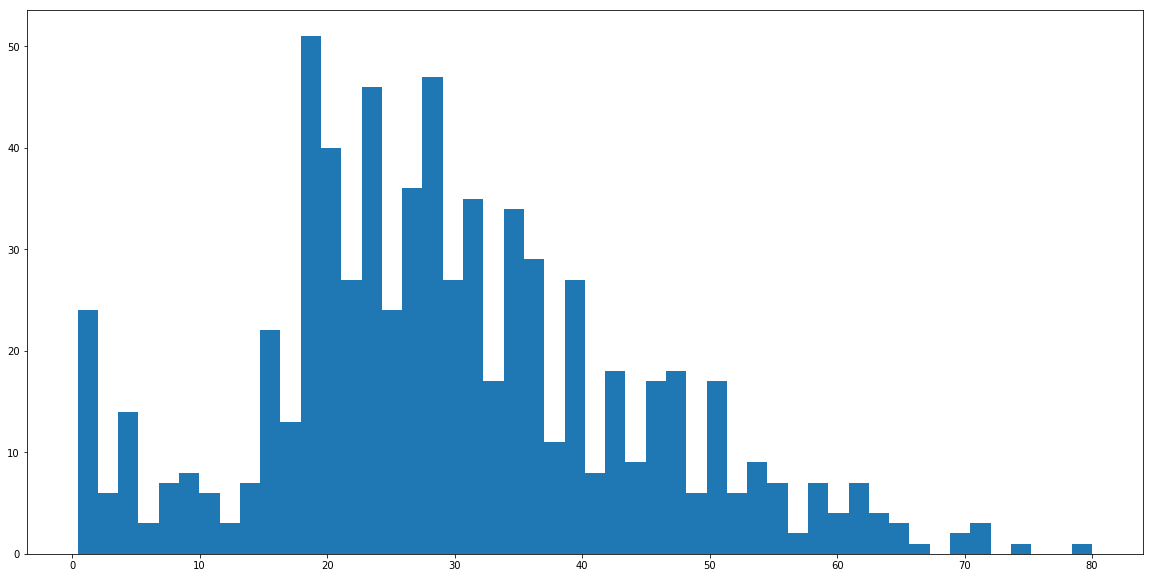

In [8]:
plt.figure(figsize = (20,10))
plt.hist(titanic['Age'], bins = 50)

In [9]:
fare_mean = titanic['Fare'].mean()

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [11]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
titanic_t['Age'] = titanic_t[['Age','Pclass']].apply(impute_age,axis=1)
# fill na in Age with meidan
titanic_t['Fare'] = titanic_t['Fare'].fillna(fare_mean)

In [12]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#fill na in Embarked with most frequent value
titanic['Embarked'] = titanic['Embarked'].fillna('S')
#fill na in Embarked with most frequent value
titanic_t['Embarked'] = titanic_t['Embarked'].fillna('S')

In [14]:
# make sure that there are no null values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Drop 'Ticket' and PassengerID' columns

In [16]:
titanic = titanic.drop(['PassengerId', 'Ticket'], axis=1)
titanic_t = titanic_t.drop(['PassengerId', 'Ticket'], axis=1)

# Feature Engineering

In [17]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [18]:
titanic['With_someone'] = titanic['SibSp'] | titanic['Parch']
titanic_t['With_someone'] = titanic_t['SibSp'] | titanic_t['Parch']

In [19]:
titanic['With_someone'] = titanic['With_someone'].apply(lambda x:1 if x >=1 else 0)
titanic_t['With_someone'] = titanic_t['With_someone'].apply(lambda x:1 if x >=1 else 0)

In [20]:
titanic['With_someone'].unique()

array([1, 0])

In [21]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_t['Title'] = titanic_t['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Capt          1
Jonkheer      1
Don           1
Sir           1
Lady          1
Ms            1
Countess      1
Name: Title, dtype: int64

In [22]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

titanic['Title'] = titanic['Title'].map(title_mapping)
titanic_t['Title'] = titanic_t['Title'].map(title_mapping)

In [23]:
titanic = titanic.drop(['Name'], axis=1)
titanic_t = titanic_t.drop(['Name'], axis=1)

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

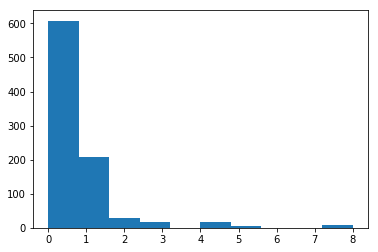

In [24]:
plt.hist(titanic['SibSp'])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

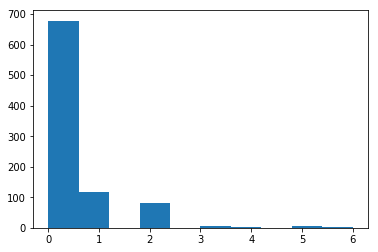

In [25]:
plt.hist(titanic['Parch'])

In [26]:
titanic['family members'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic_t['family members'] = titanic_t['SibSp'] + titanic_t['Parch'] + 1

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


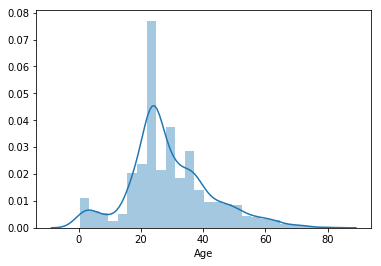

In [27]:
sns.distplot(titanic['Age'])

Age stages from: https://hhpolishinginc.com/74084_erik_erikson_developmental_stages_chart_ideas/

In [28]:
def age(x):
    if x < 5:
        return 'infant'
    elif x < 19:
        return 'adolescence'
    elif x < 35:
        return 'young adulthood'
    elif x < 51:
        return 'adulthood'
    else:
        return 'Mature adulthood'

In [29]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,With_someone,Title,family members
0,0,3,male,22.0,1,0,7.2500,S,1,0,2
1,1,1,female,38.0,1,0,71.2833,C,1,2,2
2,1,3,female,26.0,0,0,7.9250,S,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,1,2,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [30]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,With_someone,Title,family members
0,0,3,male,22.0,1,0,7.2500,S,1,0,2
1,1,1,female,38.0,1,0,71.2833,C,1,2,2
2,1,3,female,26.0,0,0,7.9250,S,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,1,2,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


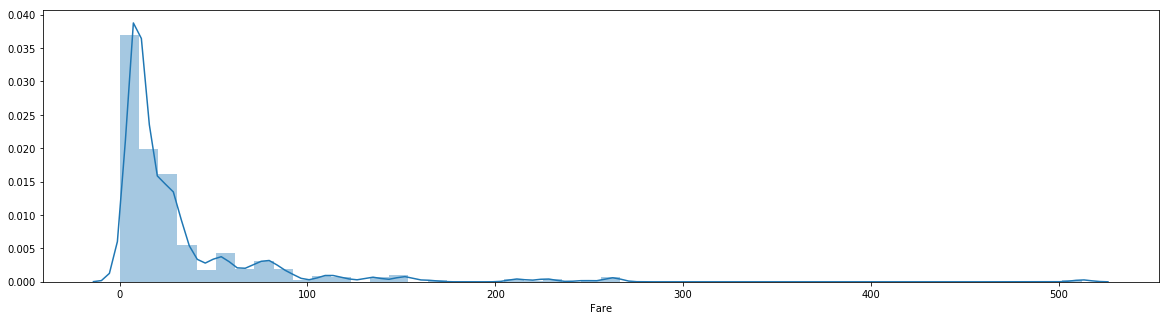

In [31]:
plt.figure(figsize = (20, 5))
sns.distplot(titanic['Fare'])

In [32]:
titanic[titanic['Fare'] > 100].shape

(53, 11)

In [33]:
def fare(x):
    if x == 0:
        return 'Stowaway'
    if x < 7:
        return 'cheap'
    elif x < 10:
        return 'mid-cheap'
    elif x < 15:
        return 'high cheap'
    elif x < 20:
        return 'medium'
    elif x < 50:
        return 'high'
    else:
        return 'very high'

In [34]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,With_someone,Title,family members
0,0,3,male,22.0,1,0,7.2500,S,1,0,2
1,1,1,female,38.0,1,0,71.2833,C,1,2,2
2,1,3,female,26.0,0,0,7.9250,S,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,1,2,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [35]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,With_someone,Title,family members
0,0,3,male,22.0,1,0,7.2500,S,1,0,2
1,1,1,female,38.0,1,0,71.2833,C,1,2,2
2,1,3,female,26.0,0,0,7.9250,S,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,1,2,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [36]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,With_someone,Title,family members
0,0,3,male,22.0,1,0,7.2500,S,1,0,2
1,1,1,female,38.0,1,0,71.2833,C,1,2,2
2,1,3,female,26.0,0,0,7.9250,S,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,1,2,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


# One hot Encoding

In [37]:
titanic = pd.get_dummies(titanic, columns = ['Pclass', 'Sex', 'Embarked', 'Title'], drop_first = True)
titanic_t = pd.get_dummies(titanic_t, columns = ['Pclass', 'Sex', 'Embarked', 'Title'], drop_first = True)

In [38]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,With_someone,family members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_1,Title_2,Title_3
0,0,22.0,1,0,7.2500,1,2,0,1,1,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,2,0,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,1,0,1,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,1,2,0,0,0,0,1,0,1,0
4,0,35.0,0,0,8.0500,0,1,0,1,1,0,1,0,0,0


In [39]:
titanic = titanic.drop(['SibSp', 'Parch', 'Age'], axis=1)
titanic_t = titanic_t.drop(['SibSp', 'Parch', 'Age'], axis=1)

In [40]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

In [41]:
X_t = titanic_t

# Feature Scaling

In [42]:
X.head()

,Fare,With_someone,family members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_1,Title_2,Title_3
0,7.2500,1,2,0,1,1,0,1,0,0,0
1,71.2833,1,2,0,0,0,0,0,0,1,0
2,7.9250,0,1,0,1,0,0,1,1,0,0
3,53.1000,1,2,0,0,0,0,1,0,1,0
4,8.0500,0,1,0,1,1,0,1,0,0,0


In [43]:
X_scale = X[['Fare', 'family members']]
X_noscale = X.drop(['Fare', 'family members'], axis=1)

X_scale_t = X_t[['Fare', 'family members']]
X_noscale_t = X_t.drop(['Fare', 'family members'], axis=1)

In [44]:
X_noscale.head()

,With_someone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_1,Title_2,Title_3
0,1,0,1,1,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,1,0,0
3,1,0,0,0,0,1,0,1,0
4,0,0,1,1,0,1,0,0,0


In [45]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X_scale)
X_scaled_t = sc_X.fit_transform(X_scale_t)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
X_scaled = pd.DataFrame(X_scaled, columns=['Fare', 'family members'])
X_scaled_t = pd.DataFrame(X_scaled_t, columns=['Fare', 'family members'])

In [47]:
X = pd.concat([X_scaled, X_noscale], axis=1)
X_t = pd.concat([X_scaled_t, X_noscale_t], axis=1)

In [48]:
X.head()

,Fare,family members,With_someone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_1,Title_2,Title_3
0,0.014151,0.1,1,0,1,1,0,1,0,0,0
1,0.139136,0.1,1,0,0,0,0,0,0,1,0
2,0.015469,0.0,0,0,1,0,0,1,1,0,0
3,0.103644,0.1,1,0,0,0,0,1,0,1,0
4,0.015713,0.0,0,0,1,1,0,1,0,0,0


# Classification model

## KNN

In [49]:
k_range = [4]
weight_options = ['uniform']
norm = [1]
algo = ['ball_tree']

In [50]:
param_grid = dict(n_neighbors = k_range, weights = weight_options, p = norm, algorithm = algo)
param_grid

{'n_neighbors': [4],
 'weights': ['uniform'],
 'p': [1],
 'algorithm': ['ball_tree']}

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [53]:
grid_knn = GridSearchCV(knn, param_grid, cv = 10, scoring='accuracy', return_train_score=False)
grid_knn.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [4], 'weights': ['uniform'], 'p': [1], 'algorithm': ['ball_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [54]:
grid_knn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

In [55]:
grid_knn.best_score_

0.8249158249158249

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()

In [57]:
param_grid = dict(n_estimators = [10], criterion = ['gini'], max_depth = [135, 140, 145])

In [58]:
grid_forest = GridSearchCV(forest_clf, param_grid, cv = 10, scoring='accuracy', return_train_score=False)
grid_forest.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10], 'criterion': ['gini'], 'max_depth': [135, 140, 145]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [59]:
grid_forest.best_params_

{'criterion': 'gini', 'max_depth': 135, 'n_estimators': 10}

In [60]:
grid_forest.best_score_

0.8013468013468014

## SVM

In [61]:
from sklearn import svm
clf = svm.SVC(probability = False)

In [62]:
param_grid = dict(C = [34], kernel = ['poly'], gamma = ['scale'], degree = [2])
param_grid

{'C': [34], 'kernel': ['poly'], 'gamma': ['scale'], 'degree': [2]}

In [63]:
grid_svm = GridSearchCV(clf, param_grid, cv = 10, scoring='accuracy', return_train_score=True)
grid_svm.fit(X, y)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [34], 'kernel': ['poly'], 'gamma': ['scale'], 'degree': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [64]:
grid_svm.best_params_

{'C': 34, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [65]:
grid_svm.best_score_

0.8327721661054994

## logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
clf_lr = LogisticRegression()

In [68]:
param_grid = dict(penalty = ['l2'], solver = ['newton-cg', 'lbfgs'])
param_grid

{'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs']}

In [69]:
grid_lr = RandomizedSearchCV(clf_lr, param_grid, cv = 10, scoring='accuracy', return_train_score=True, n_iter=150)
grid_lr.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 2 is smaller than n_iter=150. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=150, n_jobs=None,
          param_distributions={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [70]:
grid_lr.best_params_

{'solver': 'newton-cg', 'penalty': 'l2'}

In [71]:
grid_lr.best_score_

0.8069584736251403

## Decision tree (try to overfit) 

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
clf_dt = DecisionTreeClassifier()

In [74]:
param_grid = dict(criterion = ['entropy'], max_depth = [6])
param_grid
#[2, 5, 10, 30, 50, 100]

{'criterion': ['entropy'], 'max_depth': [6]}

In [75]:
grid_tree = GridSearchCV(clf_dt, param_grid, cv = 10, scoring='accuracy', return_train_score=False)
grid_tree.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy'], 'max_depth': [6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [76]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [77]:
grid_tree.best_score_

0.8316498316498316

## Gradient Boost

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
clf_gb = GradientBoostingClassifier()

In [80]:
param_grid = dict(loss = ['exponential'], learning_rate = [0.2], n_estimators = [21], max_depth = [4])
param_grid

{'loss': ['exponential'],
 'learning_rate': [0.2],
 'n_estimators': [21],
 'max_depth': [4]}

In [81]:
grid_gb = GridSearchCV(clf_gb, param_grid, cv = 10, scoring='accuracy', return_train_score=False)
grid_gb.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['exponential'], 'learning_rate': [0.2], 'n_estimators': [21], 'max_depth': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [82]:
grid_gb.best_params_

{'learning_rate': 0.2,
 'loss': 'exponential',
 'max_depth': 4,
 'n_estimators': 21}

In [83]:
grid_gb.best_score_

0.8361391694725028

## Ada Boost

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
clf_ab = AdaBoostClassifier()

In [86]:
param_grid = dict(n_estimators = [65], algorithm = ['SAMME'])
param_grid

{'n_estimators': [65], 'algorithm': ['SAMME']}

In [87]:
grid_ab = GridSearchCV(clf_ab, param_grid, cv = 10, scoring='accuracy', return_train_score=False)
grid_ab.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [65], 'algorithm': ['SAMME']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [88]:
grid_ab.best_params_

{'algorithm': 'SAMME', 'n_estimators': 65}

In [89]:
grid_ab.best_score_

0.8103254769921436

# Ensemble hard Voting

In [90]:
from sklearn.ensemble import VotingClassifier

In [91]:
eclf_hard = VotingClassifier(estimators = [('knn', grid_knn), ('forest', grid_forest), ('svm', grid_svm),
                                     ('Logistic', grid_lr), ('tree', grid_tree),
                                      ('GradientBoost', grid_gb), 
                                          ('AdaBoost', grid_ab)], voting='hard', weights=[2, 1, 2.5, 0.8, 3, 3.5, 1])

In [92]:
eclf_hard = eclf_hard.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 2 is smaller than n_iter=150. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


# Prediction and Submission

In [93]:
y_pred = eclf_hard.predict(X_t)

In [94]:
sub = pd.DataFrame(y_pred, columns=['Survived'])

In [95]:
titanic = pd.read_csv("../input/test.csv")

In [96]:
submission = pd.concat([titanic['PassengerId'], sub], axis=1)

In [97]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [98]:
submission.to_csv('sub.csv', index=False)